In [ ]:
''' PCA principal component analysis esta tecnica sirve para comprimir informacion de las imagenes manteniendo las caracteristicas mas importantes.
los datasets son grupos de datos que comparten ciertas caracteristicas, donde se extrae informacion clave 
 es dificil reinterpretar la informacion en pca
 variance is the sum of squares of differences between  all numbers and means
 es decir la varianza es la distancia  dispercion entre los datos y la media de los datos
 la covarianza  es la relacion de lasvariables entre si
 los eigen valores y eigenvectores son los vectores que definen la direccion de los datos y los valores que definen la magnitud de esos vectores del pca 
steps for PCA
1. standarize the data
2. calculate the covarianz matrix
3. compute the eigenvalues and eigenvectors
4. select principal components 
5. project data onto new basis
exercise:
feature example1 example2 example3 example4
 x          4         8         13     7
 y          11        4         5      14

x media = (4+8+13+7)/4=8.0
y media = (11+4+5+14)/4=8.5
feature example1 example2 example3 example4
 x          -4        0         5      -1
 y           2.5     -4.5      -3.5    5.5
la covarianza = (1/(n-1)*sum((xi-xmedia)(yi-ymean))

V1[0.55:0.83]  V2[-0.83:0.55]
eigv1 =30.38 eigv2=6.62
x = 2 4 6 8 10
y = 0 1 4 5 7 
media x=6 media y=3.4
standarized x = -4 -2 0 2 4
standarized y = -3.4 -2.4 0.6 1.6 3.6
covarianza = [[10 8],[8 7.3]]
eigenvectores = [[0.78  -0.62],[0.62 0.78]]
eigenvalores = [16.1 1.2]
valores nuevos x =standarizedx*eigenvectores
valores nuevos y =standarizedy*eigenvectores
valores nuevos x = [-4 -2 0 2 4]*[[0.78  -0.62],[0.62 0.78]] = [-2.48 -1.24 0 1.24 2.48]
valores nuevos y = [-3.4 -2.4 0.6 1.6 3.6]*[[0.78  -0.62],[0.62 0.78]] = [-2.65 -1.87 0.37 1.61 2.85]
val nuev x = [-2.48 -1.24 0 1.24 2.48]
val nuev y = [-2.65 -1.87 0.37 1.61 2.85]


'''


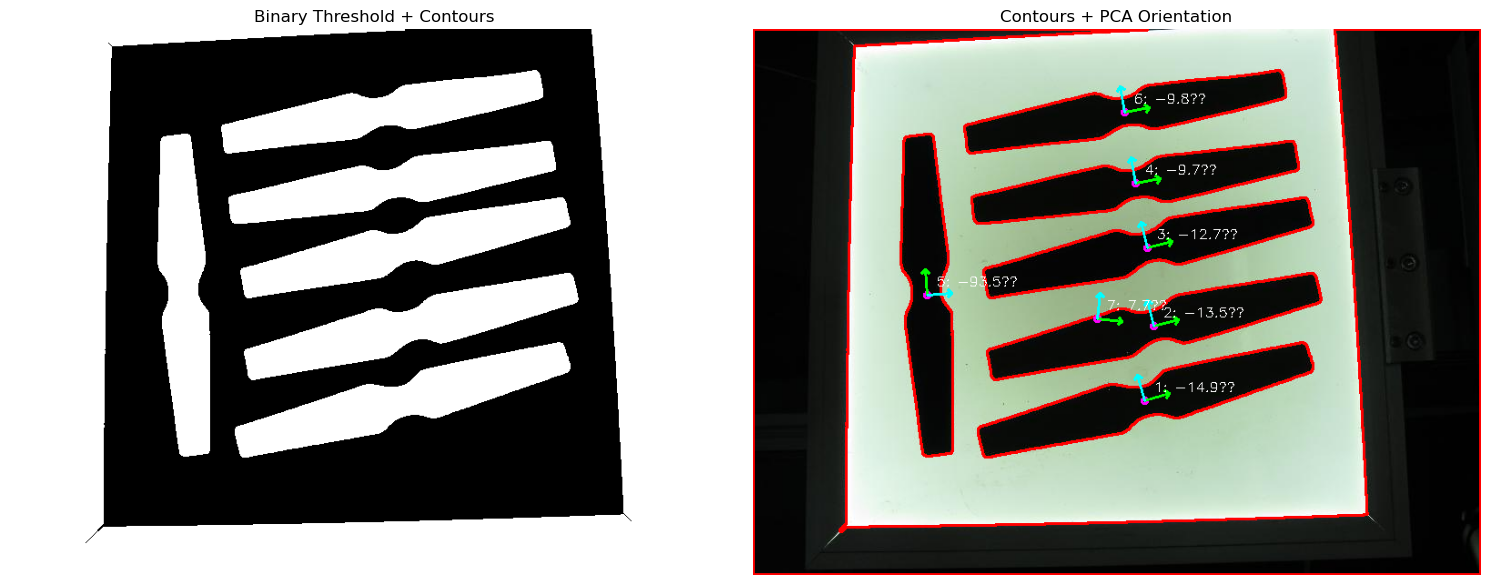

True

In [6]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img = cv2.imread("pca_test1.jpeg")
if img is None:
    raise IOError("Could not read image")

vis = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

scale = 0.02 * (img.shape[0] + img.shape[1])

for i, cnt in enumerate(contours, start=1):
    if cv2.contourArea(cnt) < 1000:
        continue

    cv2.drawContours(vis, [cnt], -1, (0, 0, 255), 2)

    data_pts = np.array(cnt, dtype=np.float64).reshape(-1, 2)
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean=np.empty((0)))
    center = tuple(np.round(mean[0]).astype(int))

    cv2.circle(vis, center, 3, (255, 0, 255), 2)

    p1 = (int(center[0] + eigenvectors[0, 0] * scale),
          int(center[1] + eigenvectors[0, 1] * scale))
    p2 = (int(center[0] - eigenvectors[1, 0] * scale),
          int(center[1] - eigenvectors[1, 1] * scale))

    cv2.arrowedLine(vis, center, p1, (0, 255, 0), 2, tipLength=0.2)   # major axis
    cv2.arrowedLine(vis, center, p2, (255, 255, 0), 2, tipLength=0.2) # minor axis

    angle = math.degrees(math.atan2(eigenvectors[0, 1], eigenvectors[0, 0]))
    cv2.putText(vis, f"{i}: {angle:.1f}°", (center[0] + 10, center[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold + Contours")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Contours + PCA Orientation")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("pca_output.png", vis)

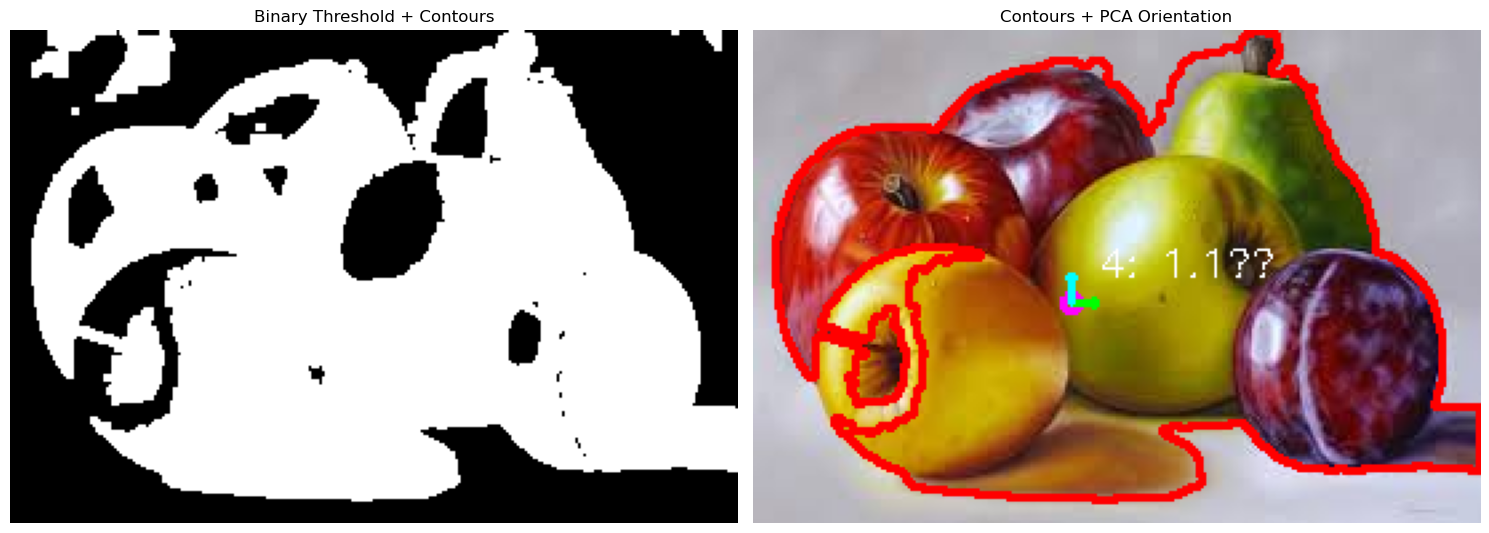

True

In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img = cv2.imread("frutas.jpeg")
if img is None:
    raise IOError("Could not read image")

vis = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((3, 3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

scale = 0.02 * (img.shape[0] + img.shape[1])

for i, cnt in enumerate(contours, start=1):
    if cv2.contourArea(cnt) < 1000:
        continue

    cv2.drawContours(vis, [cnt], -1, (0, 0, 255), 2)

    data_pts = np.array(cnt, dtype=np.float64).reshape(-1, 2)
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean=np.empty((0)))
    center = tuple(np.round(mean[0]).astype(int))

    cv2.circle(vis, center, 3, (255, 0, 255), 2)

    p1 = (int(center[0] + eigenvectors[0, 0] * scale),
          int(center[1] + eigenvectors[0, 1] * scale))
    p2 = (int(center[0] - eigenvectors[1, 0] * scale),
          int(center[1] - eigenvectors[1, 1] * scale))

    cv2.arrowedLine(vis, center, p1, (0, 255, 0), 2, tipLength=0.2)   # major axis
    cv2.arrowedLine(vis, center, p2, (255, 255, 0), 2, tipLength=0.2) # minor axis

    angle = math.degrees(math.atan2(eigenvectors[0, 1], eigenvectors[0, 0]))
    cv2.putText(vis, f"{i}: {angle:.1f}°", (center[0] + 10, center[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold + Contours")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Contours + PCA Orientation")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("pca_output.png", vis)

In [ ]:
'''utilizando mascaras binarizacion y operaciones morfologicas y usando pca quiero detectar manzanas verdes y manzanas rojas de una imagen  y contabilizarlas '''